# Packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Air density and gravity

In [7]:
rho = 1.225
gravity = 9.81

# Drone

In [8]:
class Drone:

    def __init__(self, init_z=5, init_v=0):
        # Drone parameters
        self.mass = 22.79e-3              # mass
        self.D = 45e-3                    # radius
        self.CT = 0.14                    # thrust coeff
        self.Cd = 0.1                     # drag coeff
        self.A = 0.01                     # total area
        
        # Control parameters
        self.gain_pos = 0.5               # gain_pos
        self.gain_vel = 0.7               # gain_vel
        self.K = self.gain_pos*0.2*gravity
        self.L = self.gain_vel*0.3*gravity
        
        # States
        self.z = init_z                   # height
        self.v = init_v                   # velocity
        self.a = 0                        # acceleration
        self.u = 0                        # control signal
        
        # Desired and actual force
        self.Fd = 0
        self.F = 0
        
        # Noise
        self.a_noise_sigma = 0.5
        self.u_noise_sigma = 30
        self.a_noise = 0
        self.u_noise = 0
        
        # Step
        self.step_size = 1e-4
        self.total_step = 0
        
    def position_controller(self, des_pos=0, des_vel=0):
        ez = des_pos - self.z
        dez = des_vel - self.v
        
        if (self.K*ez + gravity) > 0:
            self.Fd = self.mass*(self.K*ez + gravity) + self.mass*self.L*dez 
        else:
            self.Fd = self.mass*self.L*dez
        
        u_square = 1.0/(4*rho*self.D**4*self.CT)*self.Fd
        if u_square < 0:
            u_square = 0
        
        self.u = np.sqrt(u_square)

    def dynamics(self):
        # Noise freq is 100
        if not self.total_step % 100: 
            self.a_noise = np.random.normal(0, self.a_noise_sigma)
            self.u_noise = np.random.normal(0, self.u_noise_sigma)
        
        u = self.u + self.u_noise
        
        C_ground_effect = 1.0/(1 - 4*(0.5*self.D/(4*(0.05 + self.z)))**2)
        self.F = 4*self.CT*C_ground_effect*rho*u**2*self.D**4
        
        self.a = self.F/self.mass - gravity - 0.5*rho*self.A*self.Cd*np.abs(self.v)*self.v/self.mass + self.a_noise
        
    def process(self):
        self.position_controller()
        self.dynamics()
        self.z = self.z + self.step_size*self.v
        self.v = self.v + self.step_size*self.a
        self.total_step += 1
    
    def simulate(self, duration=10):
        Height = []
        Height = np.append(Height, self.z)
        Velocity = []
        Velocity = np.append(Velocity, self.v)
        Control = []
        Acceleration = []
        while True:
            self.process()
            Height = np.append(Height, self.z)
            Velocity = np.append(Velocity, self.v)
            Control = np.append(Control, self.u)
            Acceleration = np.append(Acceleration, self.a)
            if not self.total_step % 1000:
                print('Simulation time: ' + str(self.total_step*self.step_size))
            if self.step_size*self.total_step >= duration:
                break
        return Height[:-1], Velocity[:-1], Control, Acceleration

# Simulation

In [11]:
def Simulate():
    drone = Drone()
    Height, Velocity, Control, Acceleration = drone.simulate()
    time = np.linspace(0.001,10,10e4)
    plt.plot(time[:], Height)
    plt.xlabel("time/s")
    plt.ylabel("height/m")
    plt.title("Height")
    # plt.savefig('height.png')
    plt.show()
    
    plt.plot(time[:], Velocity)
    plt.xlabel("time/s")
    plt.ylabel("velocity/m/s")
    plt.title("Velocity")
    # plt.savefig('velocity.png')
    plt.show()
    
    plt.plot(time[:], Control)
    plt.xlabel("time/s")
    plt.ylabel("control/rps")
    plt.title("Control")
    # plt.savefig('control.png')
    plt.show()

Simulation time: 0.1
Simulation time: 0.2
Simulation time: 0.3
Simulation time: 0.4
Simulation time: 0.5
Simulation time: 0.6
Simulation time: 0.7000000000000001
Simulation time: 0.8
Simulation time: 0.9
Simulation time: 1.0
Simulation time: 1.1
Simulation time: 1.2
Simulation time: 1.3
Simulation time: 1.4000000000000001
Simulation time: 1.5
Simulation time: 1.6
Simulation time: 1.7000000000000002
Simulation time: 1.8
Simulation time: 1.9000000000000001
Simulation time: 2.0
Simulation time: 2.1
Simulation time: 2.2
Simulation time: 2.3000000000000003
Simulation time: 2.4
Simulation time: 2.5
Simulation time: 2.6
Simulation time: 2.7
Simulation time: 2.8000000000000003
Simulation time: 2.9000000000000004
Simulation time: 3.0
Simulation time: 3.1
Simulation time: 3.2
Simulation time: 3.3000000000000003
Simulation time: 3.4000000000000004
Simulation time: 3.5
Simulation time: 3.6
Simulation time: 3.7
Simulation time: 3.8000000000000003
Simulation time: 3.9000000000000004
Simulation time:

/Users/GuanyaShi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


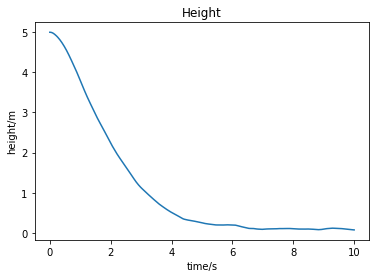

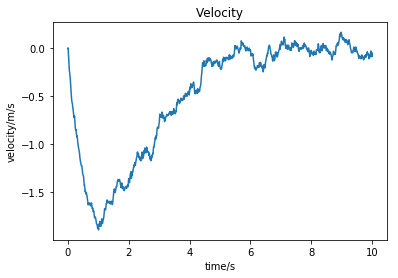

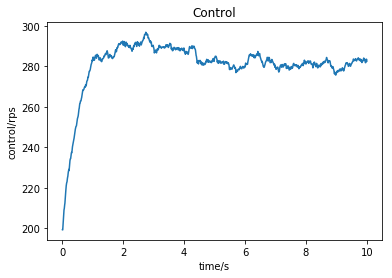

In [12]:
Simulate()